In [1]:
import tensorflow as tf

# Check available GPU and CPU devices
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import seaborn as sns

model = load_model("C:\\Users\\Matthew\\Desktop\\測試用h5檔案\\800x800原圖旋轉各半\\800x800_100原旋各半.h5")

# 將compile設置為False，這樣可以節省編譯模型所需的時間。
# compile設置為True後，可以使用以下參數來進行與模型相關的設定： 
# optimizer：優化器。常見的優化器包括Adam、SGD等。
# loss：損失函數。常見的有均方誤差（mean_squared_error）、交叉熵（categorical_crossentropy）等。
# metrics：評估指標。常見的包括準確率（accuracy）、精確度（precision）、召回率（recall）等。

# 例如 model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [53]:
# ----------載入資料用----------
classes = []
start = 2457
end = 2466
for c in range(start, end+1):
    classes.append(f"Endgame_{c}")
    
print(len(classes))
print(classes)

10
['Endgame_2457', 'Endgame_2458', 'Endgame_2459', 'Endgame_2460', 'Endgame_2461', 'Endgame_2462', 'Endgame_2463', 'Endgame_2464', 'Endgame_2465', 'Endgame_2466']


In [3]:
# ----------重塑測試集(testing set)用----------
img_height = 224 
img_width = 224

def prepare_image(file):
    img = image.load_img(file, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

AI模型訓練用資料資料分為三種：

1. 訓練集(training set)：訓練模型參數用的資料集。
2. 驗證集(validation set)：用於檢驗模型狀況的資料集，可以從資料集中自己劃分也可以使用套件劃分，如 keras 可用 validation_split='比例'去劃分多少比例的訓練資料要當驗證集。
3. 測試集(testing set)：評估模型最終表現，也可以說測試資料泛化(generalize)的能力好不好。當模型遇到沒有見過的資料時，它的表現怎麼樣。ps. 我們要避免拿測試集的結果做修正，但人性…很難避免，因為當我們看到結果不好時，多多少少都會想修正。

In [55]:
# 測試集(testing set)載入與resize與預測分類
meme_path = "C:\\Users\\Matthew\\Desktop\\測試10迷因\\"
file_extensions = ["jpg", "jpeg", "png"]
pres = []
ans = []
for f in os.listdir(meme_path):
    if f.split(".")[-1].lower() in file_extensions:
        image_name = os.path.join(meme_path, f)
        preprocessed_image = prepare_image(image_name)
        predictions = model.predict(preprocessed_image)
        index = np.argmax(predictions)
        print("image：", f)
        print("class：", classes[index])
        f = f.split("_")
        ans.append(f"{f[0]}_{f[1]}")
        pres.append(classes[index])

image： Endgame_2457_01.jpg
class： Endgame_2457
image： Endgame_2457_02.jpg
class： Endgame_2457
image： Endgame_2457_03.jpg
class： Endgame_2457
image： Endgame_2457_04.jpg
class： Endgame_2457
image： Endgame_2457_05.jpg
class： Endgame_2457
image： Endgame_2457_06.jpg
class： Endgame_2465
image： Endgame_2457_07.jpg
class： Endgame_2457
image： Endgame_2457_08.jpg
class： Endgame_2457
image： Endgame_2457_09.jpg
class： Endgame_2465
image： Endgame_2457_10.jpg
class： Endgame_2465
image： Endgame_2458_01.jpg
class： Endgame_2458
image： Endgame_2458_02.jpg
class： Endgame_2458
image： Endgame_2458_03.jpg
class： Endgame_2458
image： Endgame_2458_04.jpg
class： Endgame_2458
image： Endgame_2458_05.jpg
class： Endgame_2466
image： Endgame_2458_06.jpg
class： Endgame_2458
image： Endgame_2458_07.jpg
class： Endgame_2458
image： Endgame_2458_08.jpg
class： Endgame_2458
image： Endgame_2458_09.jpg
class： Endgame_2465
image： Endgame_2458_10.jpg
class： Endgame_2465
image： Endgame_2459_01.jpg
class： Endgame_2459
image： Endgam

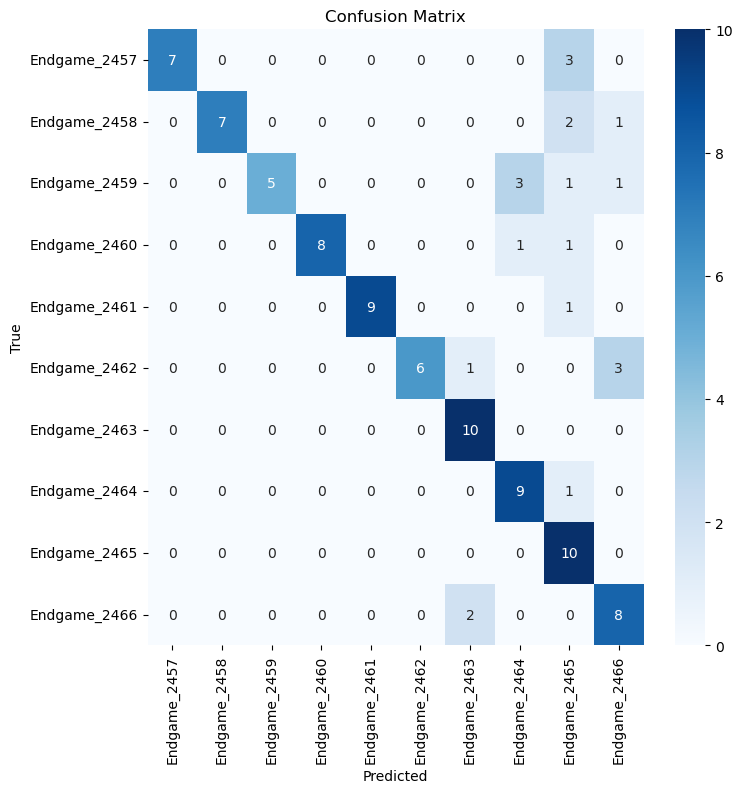

平均預測準確率為 79.00%


In [56]:
# 製作混淆矩陣
cm = confusion_matrix(ans, pres)
df = pd.DataFrame(cm, columns=classes, index=classes)
plt.figure(figsize=(8, 8)) # cell要設置在欲呈現的圖案上
# plt.figure(figsize=(5, 5))

# seaborn的熱度圖
sns.heatmap(cm,
      annot=True,
      fmt="d",
      cmap="Blues",
      xticklabels=classes,
      yticklabels=classes
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Endgame測試集')
plt.show()   

# 計算預測準確率
accuracy = np.mean(np.array(ans) == np.array(pres))
print(f'平均預測準確率為 {accuracy:.2%}')